# Requirements

In [14]:
# Add as many imports as you need.
import pandas as pd
import seaborn as sns

# Laboratory Exercise - Run Mode (8 points)

## The Vacation Preferences Dataset
The dataset contains information about individuals and their vacation preferences. It includes details such as age, gender, income, and education level. It also provides insights into their vacation habits, like the number of vacations taken each year, preferred activities (such as hiking, swimming, skiing, or sunbathing), and their budget for vacations. Other information includes the type of place they live in (urban, suburban, or rural), how far they live from mountains and beaches, and their favorite season for vacations (summer, winter, spring, or fall). The dataset also contains information whether they have pets and if they are concerned about the environment. All these features serve as input variables for predictive modeling. The 'Preference' attribute serves as the target variable, where 1 represents preference for mountains, 0 for beaches.

Load the dataset into a `pandas` data frame.

In [15]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('vacation_preferences_data.csv')
df = data.copy()

Preprocess the input and the output variables appropriately.

In [16]:
# Write your code here. Add as many boxes as you need.
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0


In [17]:
df.Education_Level.unique()

array(['bachelor', 'master', 'high school', 'doctorate', nan],
      dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     47200 non-null  float64
 1   Gender                  52444 non-null  object 
 2   Income                  52444 non-null  int64  
 3   Education_Level         49822 non-null  object 
 4   Travel_Frequency        52444 non-null  int64  
 5   Preferred_Activities    52444 non-null  object 
 6   Vacation_Budget         52444 non-null  int64  
 7   Location                52444 non-null  object 
 8   Proximity_to_Mountains  49822 non-null  float64
 9   Proximity_to_Beaches    52444 non-null  int64  
 10  Favorite_Season         52444 non-null  object 
 11  Pets                    52444 non-null  int64  
 12  Environmental_Concerns  52444 non-null  int64  
 13  Preference              52444 non-null  int64  
dtypes: float64(2), int64(7), object(5)
mem

Explore the dataset using visualizations of your choice.

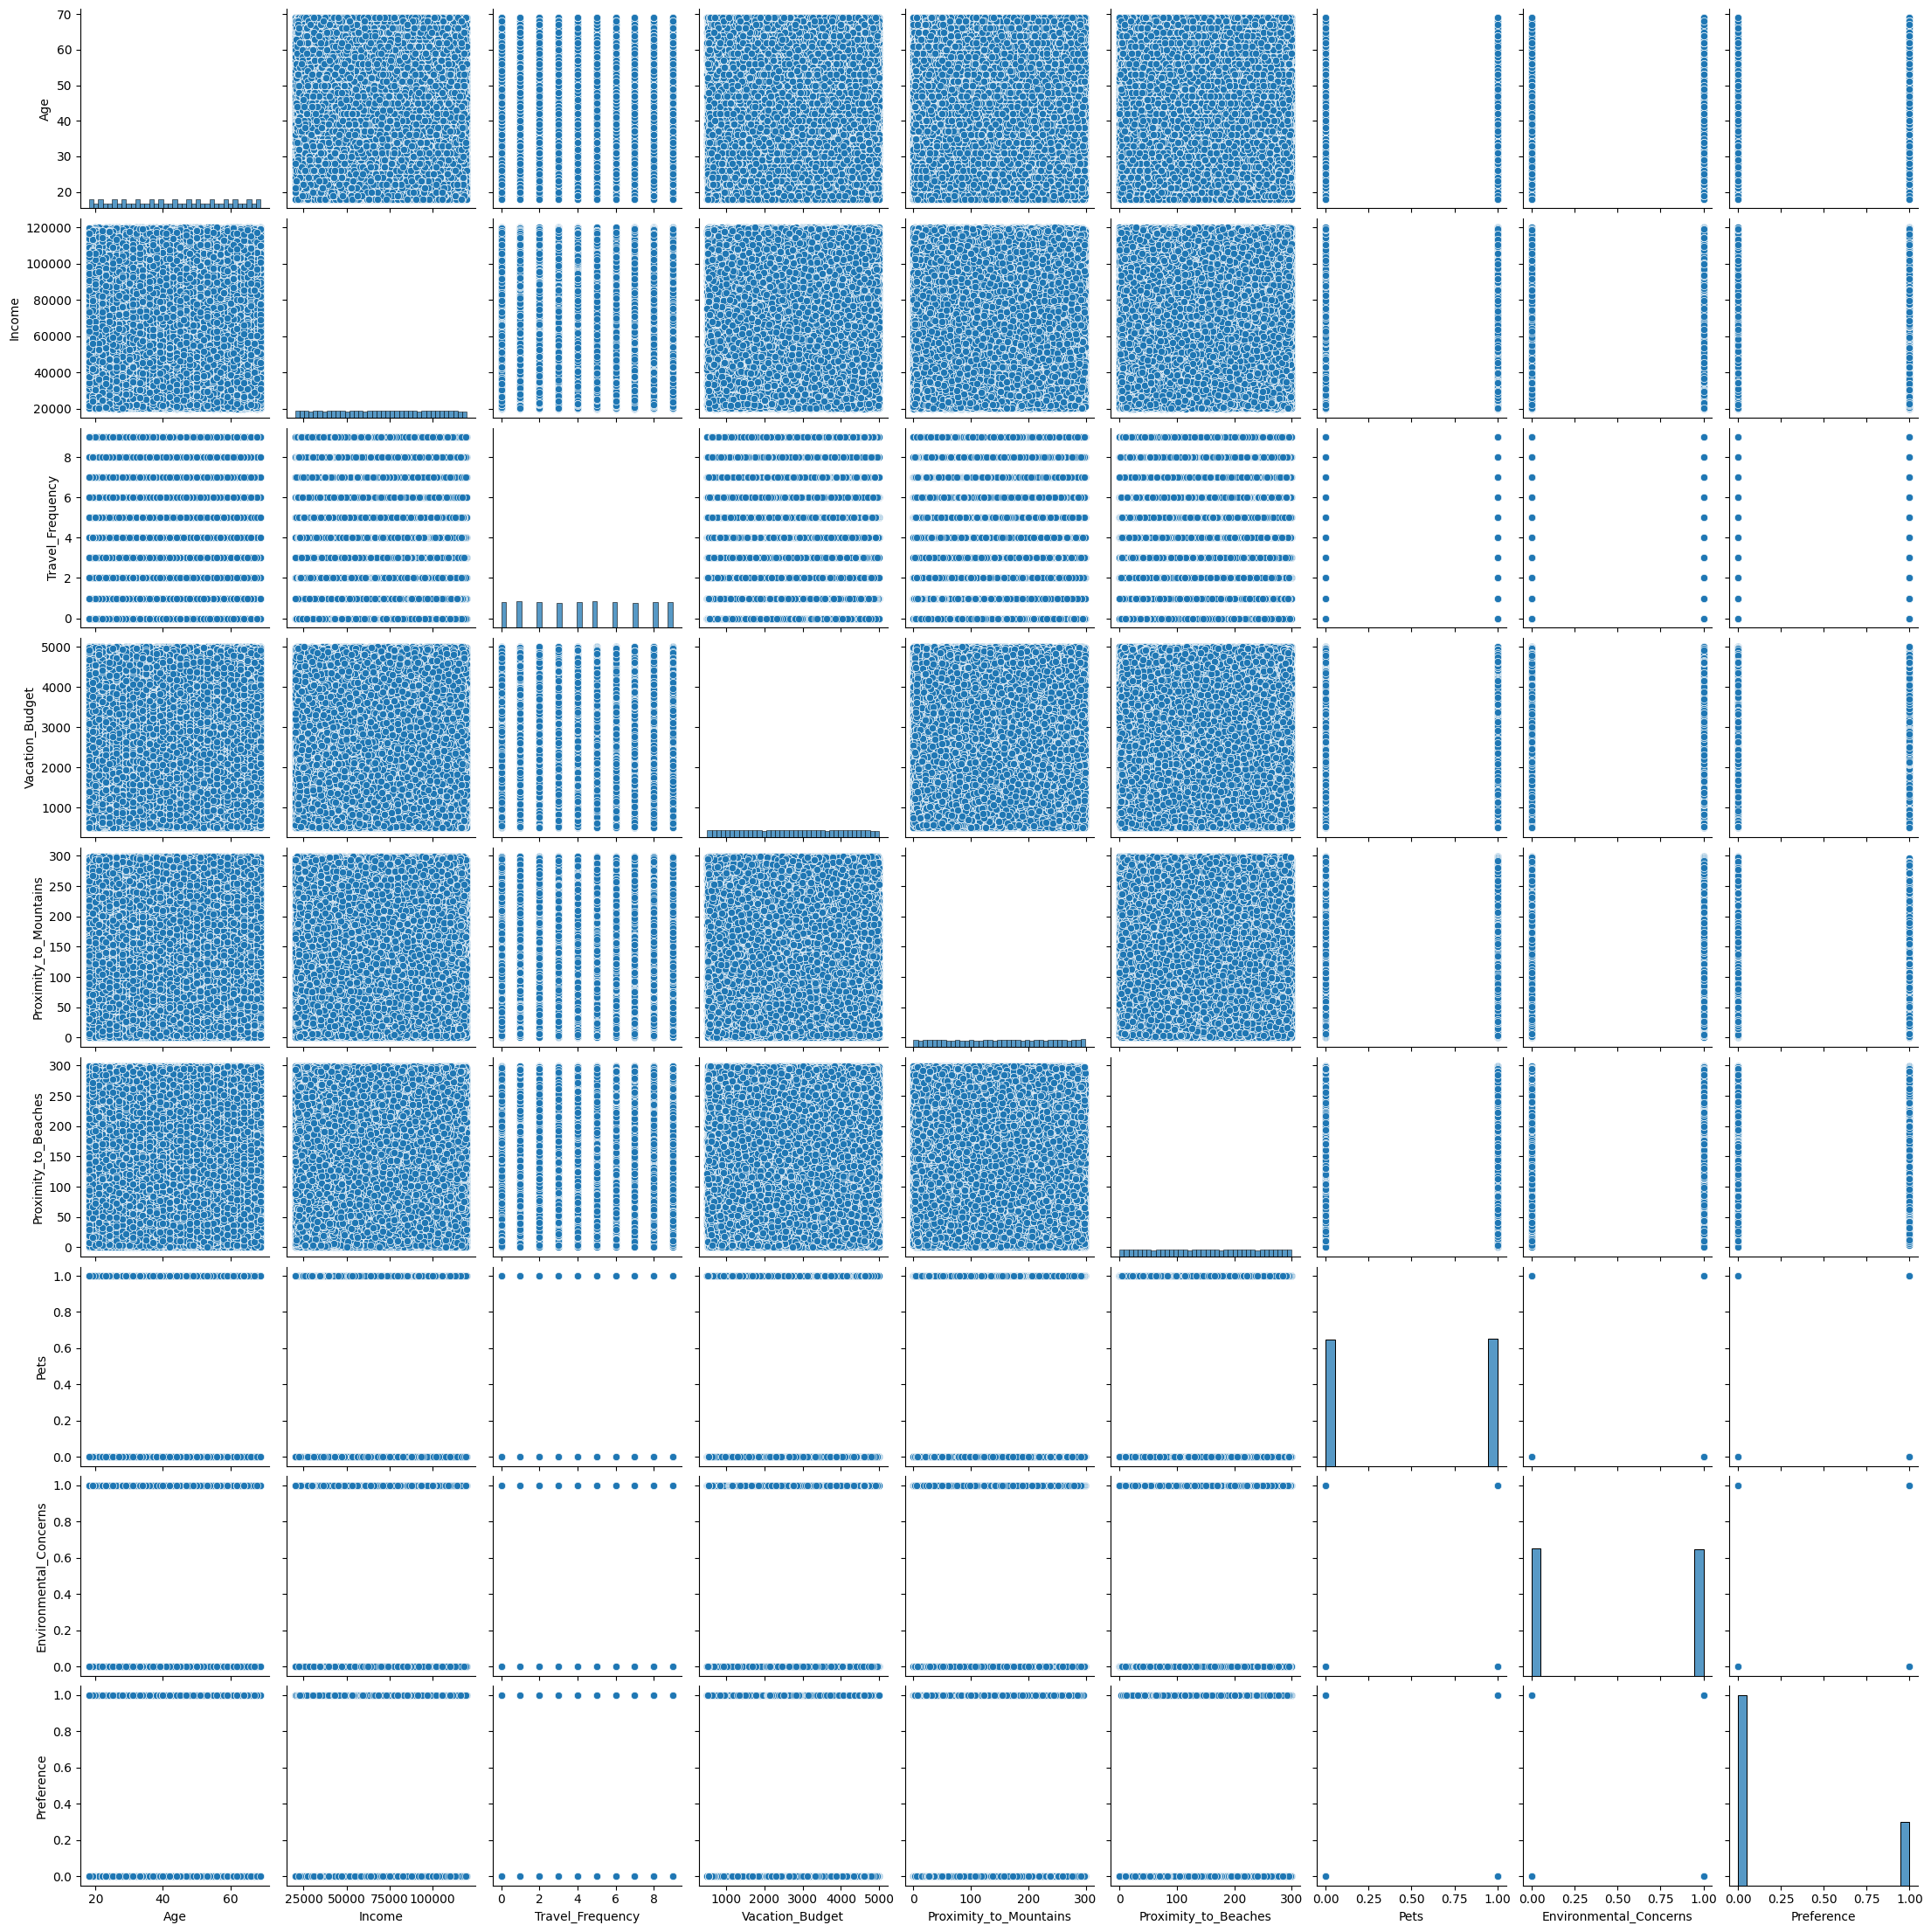

In [7]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(df)

Check if the dataset is balanced.

<Axes: >

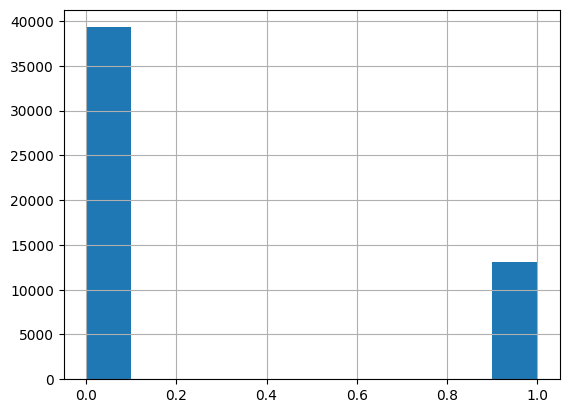

In [19]:
# Write your code here. Add as many boxes as you need.
df['Preference'].hist()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [20]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum() / len(df) * 100

Age                       9.999237
Gender                    0.000000
Income                    0.000000
Education_Level           4.999619
Travel_Frequency          0.000000
Preferred_Activities      0.000000
Vacation_Budget           0.000000
Location                  0.000000
Proximity_to_Mountains    4.999619
Proximity_to_Beaches      0.000000
Favorite_Season           0.000000
Pets                      0.000000
Environmental_Concerns    0.000000
Preference                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

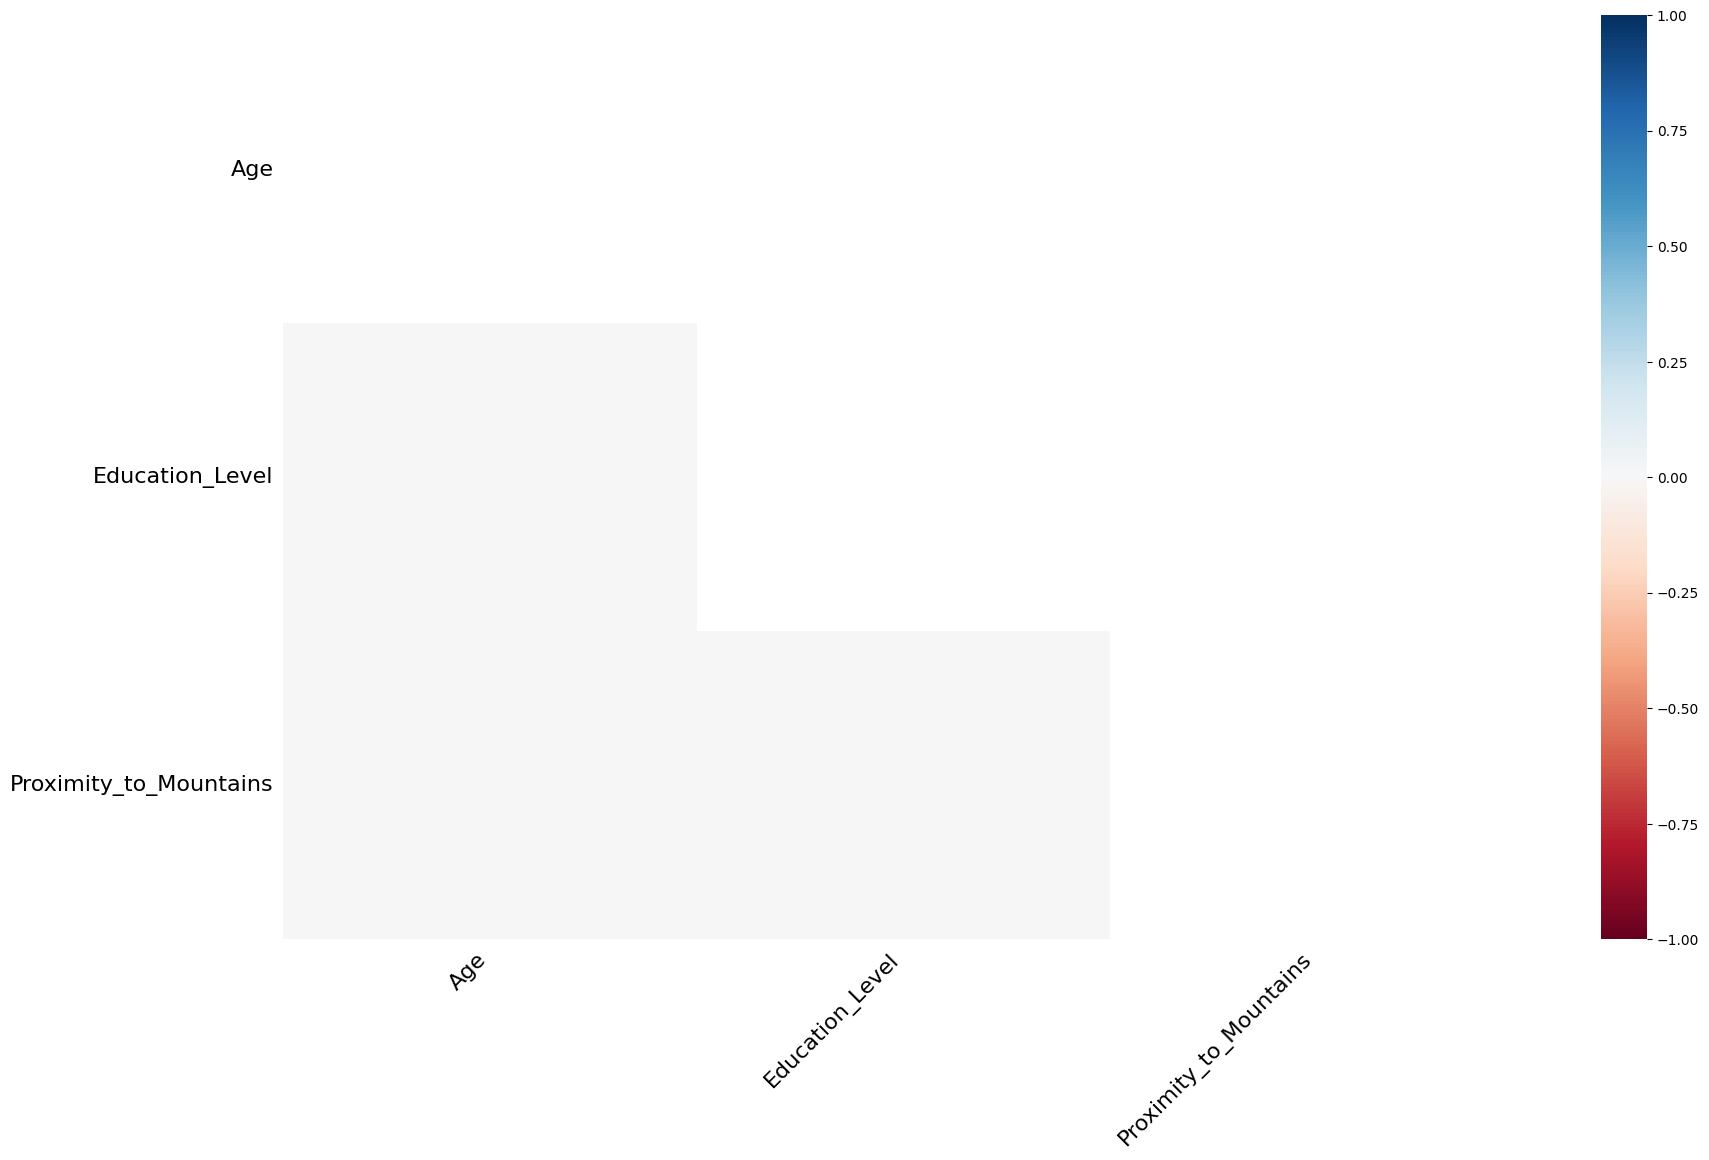

In [21]:
# Write your code here. Add as many boxes as you need.
import missingno as msno
msno.heatmap(df)

<Axes: >

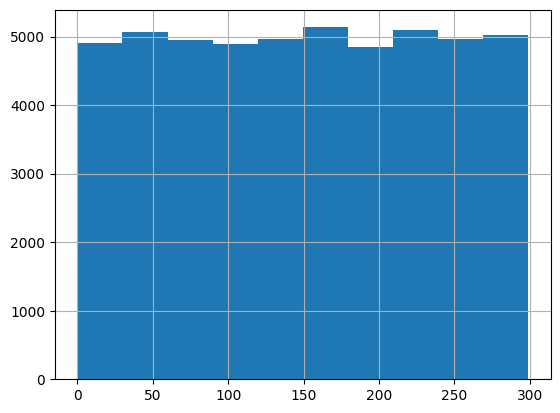

In [22]:
df['Proximity_to_Mountains'].hist()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [23]:
# Write your code here. Add as many boxes as you need.
df.Age = df.Age.fillna(df.Age.mean())

In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [25]:
encoder = LabelEncoder()
df['Education_Level'] = encoder.fit_transform(df['Education_Level'])

In [26]:
encoder.classes_

array(['bachelor', 'doctorate', 'high school', 'master', nan],
      dtype=object)

In [27]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(df[['Education_Level']])
df[['Education_Level']] = imputed_data

In [28]:
df.Education_Level.unique()

array([0., 3., 2., 1., 4.])

In [27]:
df.isnull().sum()

Age                          0
Gender                       0
Income                       0
Education_Level              0
Travel_Frequency             0
Preferred_Activities         0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
dtype: int64

In [28]:
knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(df[['Proximity_to_Mountains']])
df[['Proximity_to_Mountains']] = imputed_data

In [29]:
df.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [36]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,1,71477,0.0,9,1,2477,2,175.000000,267,2,0,1,1
1,69.0,1,88740,3.0,1,3,4777,1,149.875878,190,0,0,1,0
2,46.0,0,46562,3.0,0,1,1469,2,71.000000,280,3,0,0,1
3,32.0,2,99044,2.0,6,0,1482,0,31.000000,255,2,1,0,1
4,60.0,0,106583,2.0,5,2,516,1,23.000000,151,3,1,1,0


In [31]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [33]:
encoder = LabelEncoder()
df['Preferred_Activities'] = encoder.fit_transform(df['Preferred_Activities'])

In [34]:
encoder = LabelEncoder()
df['Location'] = encoder.fit_transform(df['Location'])

In [35]:
encoder = LabelEncoder()
df['Favorite_Season'] = encoder.fit_transform(df['Favorite_Season'])

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [49]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import train_test_split
X = df.drop(['Preference'],axis=1)
Y= df['Preference']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

## Feature Scaling
Standardize the features appropriately.

In [50]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [51]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     52444 non-null  float64
 1   Gender                  52444 non-null  int64  
 2   Income                  52444 non-null  int64  
 3   Education_Level         52444 non-null  float64
 4   Travel_Frequency        52444 non-null  int64  
 5   Preferred_Activities    52444 non-null  int64  
 6   Vacation_Budget         52444 non-null  int64  
 7   Location                52444 non-null  int64  
 8   Proximity_to_Mountains  52444 non-null  float64
 9   Proximity_to_Beaches    52444 non-null  int64  
 10  Favorite_Season         52444 non-null  int64  
 11  Pets                    52444 non-null  int64  
 12  Environmental_Concerns  52444 non-null  int64  
 13  Preference              52444 non-null  int64  
dtypes: float64(3), int64(11)
memory usage:

## Model Selection

Choose and train an approriate model for the given task.

In [53]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.1)

In [54]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>

In [55]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [56]:
# Write your code here. Add as many boxes as you need.
y_pred = model.predict(X_test)

Assess the performance of the model by using different classification metrics.

In [59]:
# Write your code here. Add as many boxes as you need.
from sklearn.metrics import accuracy_score, f1_score
f1_score(Y_test,y_pred)


np.float64(0.9799512834925989)

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [60]:
# Write your code here. Add as many boxes as you need.
X = df.drop(['Preference'],axis=1)
Y= df['Preference']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,shuffle=True)

## Feature Scaling
Standardize the features appropriately.

In [61]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [73]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import KFold, RepeatedKFold
#podatochnoto m-vo: (1,2,3,4,5) 4-train 1-test x5 vo plus 1 iteracii
kf = KFold(n_splits=5)
kf.get_n_splits(X, Y)

5

In [77]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],         
}

In [78]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=model,param_grid=param_grid,cv=kf)

In [79]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [80]:
best_model = cv.best_estimator_

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [82]:
# Write your code here. Add as many boxes as you need.
y_pred = best_model.predict(X_test)

In [84]:
f1_score(Y_test,y_pred)

np.float64(0.981409759876065)